# Capstone Project - Analyze neighborhoods in Houston to start a private school
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Neighborhood analysis](#Neighborhood_analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>


The purpose of this project is to analyze neighborhoods in **Houston** to find a best location to build a **private school**. 
Houston is a large metropolis in Texas with 2.3 million residents, is the fourth most populous city in the United States, trailing after New York, Los Angeles and Chicago. The city is the largest in the South and the Southwest. 

In this Data Science project we will analyze the number of private schools all over Houston and its neighborhoods, by visualizing the data points
on Houston map to **locate a specific area with minimum number of private school close** with valuable reasoning. We are also looking for a developed area with all amenities, where most families are attracted.
This project will be highly valuable for new business owners and stakeholders interested in opening an **private scool** in **Houston**, Texas.

In this  Data Science workflow, automated ML algorithms are used to find better recommendations for the stakeholders.

## Data <a name="data"></a>

Based on the problem, factors that influence the decision are,

- number of existing private schools in Houston.

- number of neighborhoods in Houston and its outskirt.

- neighborhood top 10 venues.

Following data will be needed to generate require information.

- List of Houston Neighborhoods is extracted from https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods.


- The private school dataset used in this project is obtained from Kaggle which is originally obtained from the US Department 
 of Homeland Security.
 It contains information about all public and private schools with attributes regarding their geographical distribution.
 https://www.kaggle.com/andrewmvd/us-schools-dataset
 
 
- List of Houston county dataset is used to filter private school dataset pertaining to Houston.

    
- The geographical location required for this project is obtained from **Foursquare API**.




In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

import seaborn as sns

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

get_ipython().system("pip install folium")
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 94 kB 6.1 MB/s  eta 0:00:01
Libraries imported.


## Methodology <a name="methodology"></a>

In this project we are focusing on finding areas of Houston with a smaller number of private schools.

In the first step, we will import USA private school data and filter schools pertaining to Texas. 
Then, we use Houston county dataset and merge both dataframes to obtain private school dataset that belongs to Houston. 
Once, the data is ready. We **analyze and explore the density of private schools** across different counties and neighborhoods in Houston.

In second, we will **use Folium and map the private schools** to get a clear picture of how they are distributes across Houston. 
From this, we can identify a few promising areas with low number of private schools in general and focus our attention on those areas.

In third and final step we will focus on most promising areas. 
We will use Foursquare API to find top 10 venues of each neighborhood in Houston and **clustering them into groups based on their development**. 
We are looking for a promising area with low number of private school that matches with the cluster that designated as highly developed area 
since housing market will be booming in those area, it will be a perfect place for stakeholders to build a private school.

### Importing USA private school data

In [2]:
# The code was removed by Watson Studio for sharing.

,X,Y,FID,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,START_GRAD,END_GRADE,FT_TEACHER,SHELTER_ID
0,-8.136078e+06,5.055506e+06,1,1201,A0507274,A CHILD'S GARDEN,20 IVY BROOK RD,SHELTON,CT,6484,6418,NOT AVAILABLE,7,1,8,FAIRFIELD,9001,USA,41.291990,-73.087632,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010/01/29 00:00:00,IMAGERY,2010/02/25 00:00:00,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,6,2,3,2,NOT AVAILABLE
1,-8.147300e+06,5.037067e+06,2,1202,A0500844,BRIDGEPORT INTERNATIONAL ACADEMY,285 LAFAYETTE ST STE 200,BRIDGEPORT,CT,6604,5755,NOT AVAILABLE,3,1,68,FAIRFIELD,9001,USA,41.167416,-73.188438,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010/01/29 00:00:00,IMAGERY/OTHER,2010/02/23 00:00:00,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2,60,14,17,8,NOT AVAILABLE
2,-8.197042e+06,5.018050e+06,3,1203,A0108054,CARMEL ACADMEY,270 LAKE AVE,GREENWICH,CT,6830,4518,NOT AVAILABLE,3,1,278,FAIRFIELD,9001,USA,41.038690,-73.635283,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010/01/29 00:00:00,IMAGERY,2010/03/05 00:00:00,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,225,3,13,53,NOT AVAILABLE
3,-8.171504e+06,5.077291e+06,4,1204,A0507283,COUNTRY KIDS CLUB,94 OLD STATE RD,BROOKFIELD,CT,6804,2524,NOT AVAILABLE,7,1,11,FAIRFIELD,9001,USA,41.438861,-73.405868,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010/01/29 00:00:00,GEOCODE,2010/02/25 00:00:00,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,10,2,3,1,NOT AVAILABLE
4,-8.197596e+06,5.017131e+06,5,1205,01612613,EAGLE HILL SCHOOL,45 GLENVILLE RD,GREENWICH,CT,6831,NOT AVAILABLE,NOT AVAILABLE,4,1,318,FAIRFIELD,9001,USA,41.032465,-73.640254,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2010/01/29 00:00:00,IMAGERY/OTHER,2010/02/26 00:00:00,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,253,4,15,65,NOT AVAILABLE


In [3]:
#Obtaining data of private schools residing in Texas
df1=df_data_1[df_data_1['STATE']=='TX']
df_privateschool=df1[['NAME','ADDRESS','CITY','STATE','ZIP','LATITUDE','LONGITUDE','COUNTY']].reset_index(drop=True)
df_privateschool.head(5)

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE,COUNTY
0,ABERCORN INTERNATIONAL SCHOOL,601 RANCH ROAD 620 S,LAKEWAY,TX,78734,30.358420,-97.954604,TRAVIS
1,LITTLE WONDERS OF BAYBROOK BAPTIST,15775 HOPE VILLAGE RD,FRIENDSWOOD,TX,77546,29.546736,-95.181188,HARRIS
2,LLANO CHRISTIAN ACADEMY,904 BERRY STREET,LLANO,TX,78643,30.748595,-98.676792,LLANO
3,LOGOS PREPARATORY SCHOOL,13303 SOUTHWEST FWY,SUGAR LAND,TX,77478,29.625180,-95.594861,FORT BEND
4,MACEDONIAN CHRISTIAN ACADEMY,401 N VAL VERDE RD,DONNA,TX,78537,26.180366,-98.082358,HIDALGO


### Using Houston county data to filter private school designated in Houston 

In [4]:
filename='https://en.m.wikipedia.org/wiki/Greater_Houston#Counties'
tables = pd.read_html(filename)
df_county=tables[4]
df_county.drop(df_county.tail(1).index,inplace=True)
df_county.drop(df_county.columns[-1], axis=1, inplace=True)
df_county

,County,2017 Estimate,2010 Census,Change,Area
0,Austin County,29786,28417,+4.82%,"646.51 sq mi (1,674.5 km2)"
1,Brazoria County,362457,313166,+15.74%,"1,357.70 sq mi (3,516.4 km2)"
2,Chambers County,41441,35096,+18.08%,"597.14 sq mi (1,546.6 km2)"
3,Fort Bend County,764828,585375,+30.66%,"861.48 sq mi (2,231.2 km2)"
4,Galveston County,335036,291309,+15.01%,378.36 sq mi (979.9 km2)
5,Harris County,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
6,Liberty County,83658,75643,+10.60%,"1,158.42 sq mi (3,000.3 km2)"
7,Montgomery County,570934,455746,+25.27%,"1,041.73 sq mi (2,698.1 km2)"
8,Waller County,51307,43205,+18.75%,"513.43 sq mi (1,329.8 km2)"


In [5]:
df_county['County'] = df_county['County'].str.split(' ').str[0]
df_county.iloc[3,0]=df_county.iloc[3,0].replace('Fort','Fort Bend')
df_county['County'] = df_county['County'].str.upper() 
df_county.columns = map(str.upper, df_county.columns)
df_hou_school=pd.merge(df_privateschool,df_county,on='COUNTY', how='right')
df_hou_school.drop(df_hou_school.tail(1).index, 
        inplace = True) 
df_hou_school.head(5)

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE,COUNTY,2017 ESTIMATE,2010 CENSUS,CHANGE,AREA
0,LITTLE WONDERS OF BAYBROOK BAPTIST,15775 HOPE VILLAGE RD,FRIENDSWOOD,TX,77546.0,29.546736,-95.181188,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
1,MONTESSORI COUNTRY DAY SCHOOL,5117 LA BRANCH ST,HOUSTON,TX,77004.0,29.726000,-95.382833,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
2,SMALL STEPS NURTURING CENTER - JENSEN,2902 JENSEN DR,HOUSTON,TX,77026.0,29.788457,-95.341571,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
3,UNIVERSITY PARK ACADEMY,5830 VAN FLEET ST,HOUSTON,TX,77033.0,29.673552,-95.332990,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
4,AL-HADI SCHOOL OF ACCELERATIVE LEARNING,2313 S VOSS RD,HOUSTON,TX,77057.0,29.742047,-95.500218,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"


In [6]:
df_hou_school.groupby(["COUNTY"])
df_hou_school

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE,COUNTY,2017 ESTIMATE,2010 CENSUS,CHANGE,AREA
0,LITTLE WONDERS OF BAYBROOK BAPTIST,15775 HOPE VILLAGE RD,FRIENDSWOOD,TX,77546.0,29.546736,-95.181188,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
1,MONTESSORI COUNTRY DAY SCHOOL,5117 LA BRANCH ST,HOUSTON,TX,77004.0,29.726000,-95.382833,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
2,SMALL STEPS NURTURING CENTER - JENSEN,2902 JENSEN DR,HOUSTON,TX,77026.0,29.788457,-95.341571,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
3,UNIVERSITY PARK ACADEMY,5830 VAN FLEET ST,HOUSTON,TX,77033.0,29.673552,-95.332990,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
4,AL-HADI SCHOOL OF ACCELERATIVE LEARNING,2313 S VOSS RD,HOUSTON,TX,77057.0,29.742047,-95.500218,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
5,CENTER FOR HEARING AND SPEECH,3636 W DALLAS ST,HOUSTON,TX,77019.0,29.757739,-95.407894,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
6,CUNAE INTERNATIONAL SCHOOL,5655 CREEKSIDE FOREST DR,THE WOODLANDS,TX,77389.0,30.140790,-95.508789,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
7,DAY SCHOOL FOR LITTLE PEOPLE,2714 FERRY RD,BAYTOWN,TX,77520.0,29.754086,-94.927480,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
8,FIRST STEPS MONTESSORI SCHOOL,2450 RIVER OAKS BLVD,HOUSTON,TX,77019.0,29.742715,-95.427035,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
9,HEALTH AND HUMAN SERVICE ACADEMY,PO BOX 3731,HOUSTON,TX,77253.0,29.831319,-95.375713,HARRIS,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"


## Analysis <a name="analysis"></a>

### Let's perform some basic explanatory data analysis and derive some additional info from our raw data.

In [7]:
df_count1=df_hou_school.groupby(['COUNTY']).count()
df_count1=df_count1.drop(['ADDRESS','CITY','STATE','ZIP','LATITUDE','LONGITUDE','2017 ESTIMATE','2010 CENSUS','CHANGE','AREA'],axis=1)
df_count1.rename(columns={"NAME": "NUM_OF_SCHOOLS"})

,NUM_OF_SCHOOLS
COUNTY,
AUSTIN,2
BRAZORIA,16
FORT BEND,54
GALVESTON,20
HARRIS,319
LIBERTY,3
MONTGOMERY,33
WALLER,2


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_count1.plot(kind='bar',figsize=(15,8))
labels = ['AUSTIN','BRAZORIA','FORT BEND','GALVESTON','HARRIS','LIBERTY','MONTGOMERY','WALLER']
values = [2,16,54,20,319,3,33,2]
plt.bar(labels,values,color=['lightgreen', 'orange', 'green', 'purple', 'blue','gray', 'lightgreen','black'])
plt.title('Number of schools in each county')
plt.ylabel("Number of schools")
plt.show()

NameError: name 'df_count1' is not defined

In [9]:
df=df_county[['COUNTY','2010 CENSUS','2017 ESTIMATE']]
df=df.set_index(['COUNTY'])
df

,2010 CENSUS,2017 ESTIMATE
COUNTY,,
AUSTIN,28417,29786
BRAZORIA,313166,362457
CHAMBERS,35096,41441
FORT BEND,585375,764828
GALVESTON,291309,335036
HARRIS,4092459,4652980
LIBERTY,75643,83658
MONTGOMERY,455746,570934
WALLER,43205,51307


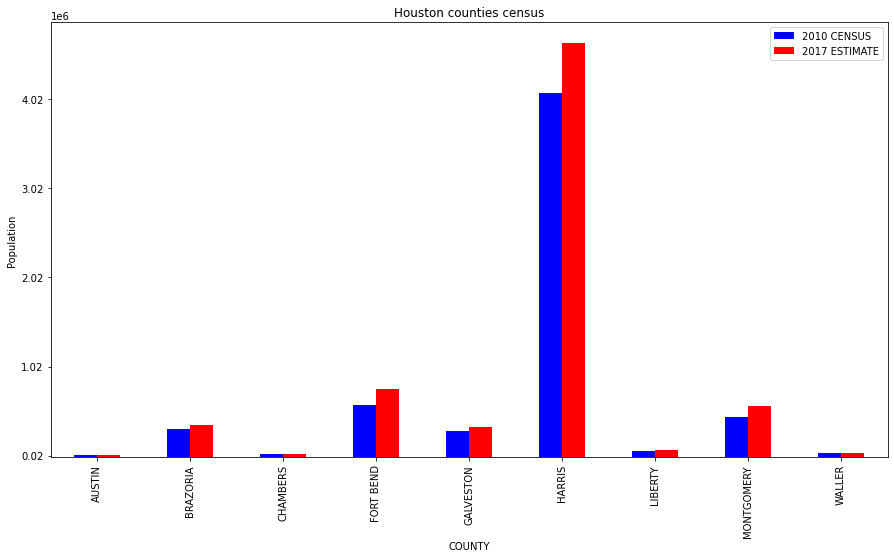

In [10]:
df.plot(kind='bar',color=('blue','red'),figsize=(15,8))
plt.title('Houston counties census')
plt.yticks(np.arange(20000, 4500000, 1000000))
plt.ylabel("Population")
plt.show()

#### Based on the analysis, there wasn't much of development in Austin, Liberty, Galveston and Waller county in the span of 7 years. These counties might have a slow pace in development in future. Our best shot is to go with Brazoria, Fort Bend, Harris and Montgomery county.

In [11]:
df_count2=df_hou_school.groupby(['COUNTY','CITY']).count()
df_count2=df_count2[['NAME']]
df_count2=df_count2.rename(columns={"NAME": "NUM_OF_SCHOOLS"})
df_count2

NUM_OF_SCHOOLS
COUNTY     CITY                         
AUSTIN     BELLVILLE                   2
BRAZORIA   ALVIN                       1
           ANGLETON                    1
           LAKE JACKSON                1
           PEARLAND                   11
           RICHWOOD                    1
           SWEENY                      1
FORT BEND  HOUSTON                     3
           KATY                        4
           MISSOURI CITY              13
           RICHMOND                    5
           ROSENBERG                   2
           SIMONTON                    1
           STAFFORD                    5
           SUGAR LAND                 21
GALVESTON  DICKINSON                   3
           FRIENDSWOOD                 2
           GALVESTON                   6
           HITCHCOCK                   1
           LEAGUE CITY                 5
           TEXAS CITY                  3
HARRIS     BAYTOWN                     4
           BELLAIRE                    4
           CHANNELVIEW                 1
           CROSBY                      3
           CYPRESS                     4
           FRIENDSWOOD                 3
           GALENA PARK                 1
           HIGHLANDS                   1
           HOUSTON                   227
           HUMBLE                      8
           KATY                       16
           KINGWOOD                    7
           LA PORTE                    1
           PASADENA                    9
           SPRING                     19
           THE WOODLANDS               1
           TOMBALL                     7
           WEBSTER                     3
LIBERTY    CLEVELAND,                  1
           DAYTON                      1
           LIBERTY                     1
MONTGOMERY CONROE                     11
           MAGNOLIA                    1
           PORTER                      1
           SPRING                      1
           THE WOODLANDS              19
WALLER     HEMPSTEAD                   1
           WALLER                      1

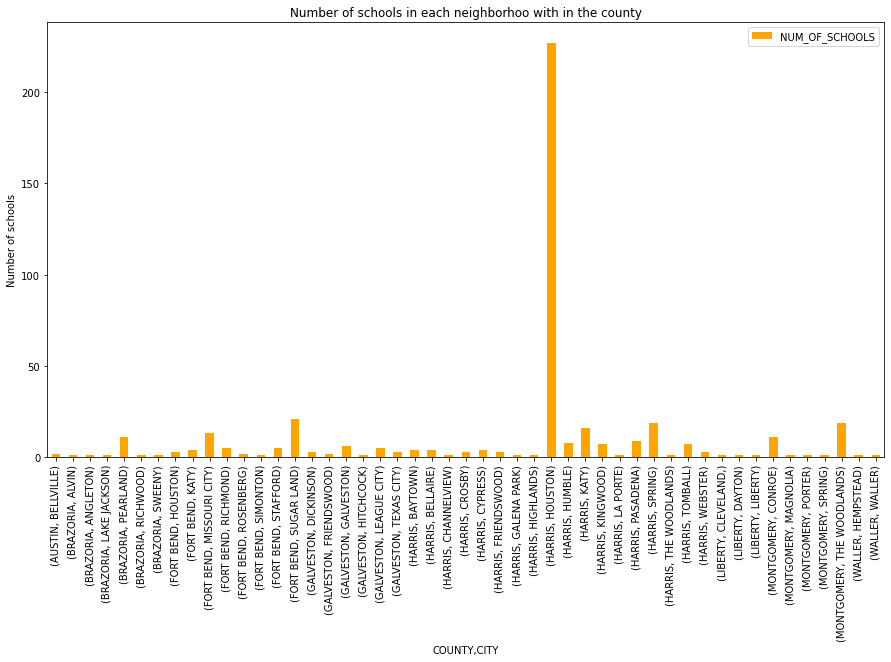

In [12]:
df_count2.plot(kind='bar',color='orange',figsize=(15,8))
plt.title('Number of schools in each neighborhoo with in the county')
plt.ylabel("Number of schools")
plt.show()

#### Above graph shows number of schools in individual neighborhood within the county. We see the neighborhood in counties with significant change in population ( Harris, FortBend, Brazoria and Montgomery county) has maximum number of private school. Let's look at the distribution of these schools on map to get a clear picture.

In [12]:
df_hou_school['COUNTY']=df_hou_school['COUNTY'].replace({'HARRIS': 1, 'FORT BEND': 2,'GALVESTON':3,'BRAZORIA':4,'MONTGOMERY':5,'LIBERTY':6,'WALLER':7,'AUSTIN':8})
df_hou_school

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE,COUNTY,2017 ESTIMATE,2010 CENSUS,CHANGE,AREA
0,LITTLE WONDERS OF BAYBROOK BAPTIST,15775 HOPE VILLAGE RD,FRIENDSWOOD,TX,77546.0,29.546736,-95.181188,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
1,MONTESSORI COUNTRY DAY SCHOOL,5117 LA BRANCH ST,HOUSTON,TX,77004.0,29.726000,-95.382833,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
2,SMALL STEPS NURTURING CENTER - JENSEN,2902 JENSEN DR,HOUSTON,TX,77026.0,29.788457,-95.341571,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
3,UNIVERSITY PARK ACADEMY,5830 VAN FLEET ST,HOUSTON,TX,77033.0,29.673552,-95.332990,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
4,AL-HADI SCHOOL OF ACCELERATIVE LEARNING,2313 S VOSS RD,HOUSTON,TX,77057.0,29.742047,-95.500218,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
5,CENTER FOR HEARING AND SPEECH,3636 W DALLAS ST,HOUSTON,TX,77019.0,29.757739,-95.407894,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
6,CUNAE INTERNATIONAL SCHOOL,5655 CREEKSIDE FOREST DR,THE WOODLANDS,TX,77389.0,30.140790,-95.508789,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
7,DAY SCHOOL FOR LITTLE PEOPLE,2714 FERRY RD,BAYTOWN,TX,77520.0,29.754086,-94.927480,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
8,FIRST STEPS MONTESSORI SCHOOL,2450 RIVER OAKS BLVD,HOUSTON,TX,77019.0,29.742715,-95.427035,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"
9,HEALTH AND HUMAN SERVICE ACADEMY,PO BOX 3731,HOUSTON,TX,77253.0,29.831319,-95.375713,1,4652980,4092459,+13.70%,"1,703.48 sq mi (4,412.0 km2)"


In [11]:
#Houston geolocation is obtained to markdown and view how the private school that are distributed. 
address = 'Houston, TX'

geolocator = Nominatim(user_agent="tx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston City are 29.7589382, -95.3676974.


In [14]:
map_privateschool = folium.Map(location=[latitude, longitude], zoom_start=9.3)

# add markers to map
for lat, lng, name, cluster in zip(df_hou_school['LATITUDE'], df_hou_school['LONGITUDE'],df_hou_school['NAME'],df_hou_school['COUNTY']):
    colors=['red', 'blue', 'green', 'purple', 'orange', 'lightgreen','gray', 'black','lightred']
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_privateschool)  
    
map_privateschool

#### In the above map, we see most schools are crowded on Southwest part of Houston which cover FortBend county and part of Harris county. Private schools are widely spread on North-east side of the city. Norrowing down our search to the low number of private school area ( northeast part of Houston), we can find a better area to build the private school. Let's look at the venues in each neighborhood and cluster them based on the development and see whether the area that we picked( Northeast part ) falls under developed area cluster.

##  Houston Neighorhood coordinates using geolocator


In [7]:
#Downloading Houston neighborhoods data 
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods')
df=table[0]
df

,#,Name,Location relative to Downtown Houston,Approximate boundaries
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...
5,6,Acres Home,Northwest,West of Interstate 45 North and south of State...
6,7,Hidden Valley,North,In a triangular area between Veterans Memorial...
7,8,Westbranch,West,Along Beltway 8 south of Jersey Village
8,9,Addicks / Park Ten,West,Includes the entirety of Addicks Reservoir and...
9,10,Spring Branch West,West,North of Interstate 10 west between Addicks Re...


In [8]:
#To find the geolocation of each neighborhood, we use geolacator function.
address= df['Name'].apply(lambda x: x+', Houston') #geolocation of Houston Neighborhoods
geolocater= Nominatim(user_agent="tx_explorer")
location=[]
empty=[]

def getcoords(add):
    try:
        coords= geolocater.geocode(add, timeout=20)
        location.append([add, coords.latitude, coords.longitude])
        print("the coords are {}".format(location[-1]))
    
    
    except:
        empty.append([add])
        print("Couldn't find coords of {}".format(empty[-1]))
        
for add in address:
        getcoords(add)

the coords are ['Willowbrook, Houston', 29.660253849999997, -95.45609615128879]
the coords are ['Greater Greenspoint, Houston', 29.944719, -95.41607390828516]
the coords are ['Carverdale, Houston', 29.8486866, -95.53945014466453]
the coords are ['Fairbanks / Northwest Crossing, Houston', 29.8527259, -95.5243864]
Couldn't find coords of ['Greater Inwood, Houston']
the coords are ['Acres Home, Houston', 32.636256, -83.692962]
the coords are ['Hidden Valley, Houston', 29.8929145, -95.4181310543807]
the coords are ['Westbranch, Houston', 29.839541, -95.55152235109065]
the coords are ['Addicks / Park Ten, Houston', 29.787215, -95.643888]
the coords are ['Spring Branch West, Houston', 29.8014103, -95.5478793]
the coords are ['Langwood, Houston', 29.8262816, -95.4827951690116]
Couldn't find coords of ['Central Northwest (formerly Near Northwest), Houston']
the coords are ['Independence Heights, Houston', 29.8369046, -95.3988589085424]
Couldn't find coords of ['Lazybrook / Timbergrove, Houston

In [9]:
#convreting geolaction data into a dataframe for easy analysis
df_location=pd.DataFrame(location,columns=["Neighborhood","Latitude","Longitude"])
df_location.head()

,Neighborhood,Latitude,Longitude
0,"Willowbrook, Houston",29.660254,-95.456096
1,"Greater Greenspoint, Houston",29.944719,-95.416074
2,"Carverdale, Houston",29.848687,-95.539450
3,"Fairbanks / Northwest Crossing, Houston",29.852726,-95.524386
4,"Acres Home, Houston",32.636256,-83.692962


In [12]:
# map of Houston using latitude and longitude values
map_houston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_location['Latitude'], df_location['Longitude'],df_location['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='lime',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston

In [13]:
# Eploring neighborhoods in Houston
CLIENT_ID = 'BOD1KLFWXGLCKIUNPIIQCCJNZ5FTERMWVDNQDKIPY4YP05BM' #  Foursquare ID
CLIENT_SECRET = 'ZNV5SKRDN4ZEM3VOVJWJGPDINTMQANRE01J4EGCIXESBLXRF' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [14]:
def getNearbyVenues(names, latitudes, longitudes,LIMIT=200, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Houston_venues = getNearbyVenues(names=df_location['Neighborhood'],latitudes=df_location['Latitude'],longitudes=df_location['Longitude'])

Willowbrook, Houston
Greater Greenspoint, Houston
Carverdale, Houston
Fairbanks / Northwest Crossing, Houston
Acres Home, Houston
Hidden Valley, Houston
Westbranch, Houston
Addicks / Park Ten, Houston
Spring Branch West, Houston
Langwood, Houston
Independence Heights, Houston
Greater Heights, Houston
Memorial, Houston
Briar Forest, Houston
Westchase, Houston
Alief, Houston
Sharpstown, Houston
Gulfton, Houston
University Place, Houston
Westwood, Houston
Braeburn, Houston
Meyerland, Houston
Braeswood, Houston
Medical Center, Houston
Astrodome Area, Houston
South Main, Houston
Westbury, Houston
Fondren Gardens, Houston
Central Southwest, Houston
Fort Bend / Houston, Houston
IAH Airport, Houston
Kingwood, Houston
Lake Houston, Houston
Jensen, Houston
Trinity / Houston Gardens, Houston
East Houston, Houston
Settegast, Houston
Northside Village, Houston
Kashmere Gardens, Houston
Pleasantville Area, Houston
Northshore, Houston
Downtown, Houston
Midtown, Houston
Second Ward, Houston
Harrisburg

In [16]:
print(Houston_venues.shape)
Houston_venues.head()

(641, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Willowbrook, Houston",29.660254,-95.456096,"American Dream Inspections TX, LLC",29.658770,-95.456130,Home Service
1,"Willowbrook, Houston",29.660254,-95.456096,Ultimate Radiant Barrier & Insulation,29.656731,-95.455377,Furniture / Home Store
2,"Willowbrook, Houston",29.660254,-95.456096,Drum Teacher,29.658871,-95.460107,Performing Arts Venue
3,"Willowbrook, Houston",29.660254,-95.456096,Jacob pad,29.664319,-95.457507,Art Gallery
4,"Greater Greenspoint, Houston",29.944719,-95.416074,Carnival @ Greenspoint,29.944084,-95.414857,Theme Park


## Neighborhood analysis <a name="Neighborhood_analysis"></a>

In [17]:
df_venue=Houston_venues.groupby('Neighborhood').count()
df_venue=df_venue.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1)
df_venue

,Venue Category
Neighborhood,
"Acres Home, Houston",2
"Addicks / Park Ten, Houston",26
"Alief, Houston",5
"Astrodome Area, Houston",17
"Braeburn, Houston",8
"Braeswood, Houston",4
"Briar Forest, Houston",3
"Carverdale, Houston",3
"Central Southwest, Houston",39


In [18]:
df_venue.astype('int64')
df_venue=df_venue[df_venue['Venue Category']>=20]
df_venue

,Venue Category
Neighborhood,
"Addicks / Park Ten, Houston",26
"Central Southwest, Houston",39
"Downtown, Houston",33
"IAH Airport, Houston",55
"Kingwood, Houston",50
"Memorial, Houston",28
"Northshore, Houston",25
"South Main, Houston",45
"South Park, Houston",45


NameError: name 'plt' is not defined

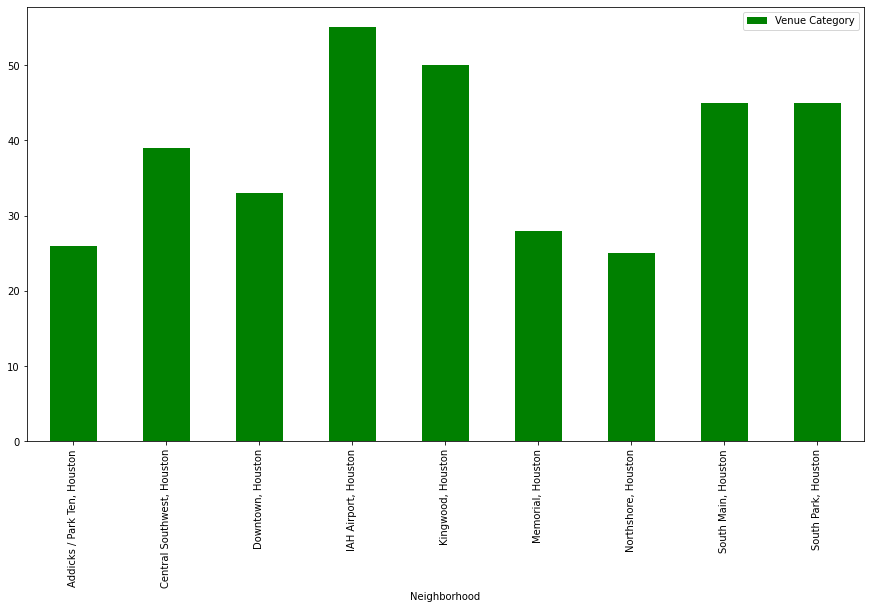

In [19]:
df_venue.plot(kind='bar',color='Green',figsize=(15,8))
plt.title('Number of venue catogories in each neighborhood')
plt.ylabel("Venue")
plt.show()

### Above graph displays neighborhood with maximum venue categories. Lets look at these selected neighborhoods on map to see which part of Houston are they located.

In [20]:
df_max_venue=pd.merge(df_venue,Houston_venues,on='Neighborhood', how='right')
df_max_venue.drop(['Venue','Venue Latitude','Venue Longitude','Venue Category_y','Venue Category_x'],axis=1,inplace=True)
df2_max=df_max_venue.drop_duplicates(subset = ["Neighborhood"])
df_maxvenue_nbhood=df2_max.head(6)
df_maxvenue_nbhood

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,"Addicks / Park Ten, Houston",29.787215,-95.643888
26,"Central Southwest, Houston",29.758938,-95.367697
65,"Downtown, Houston",29.764282,-95.367413
98,"IAH Airport, Houston",29.984142,-95.332986
153,"Kingwood, Houston",30.049708,-95.184630
203,"Memorial, Houston",29.713527,-95.396275


In [21]:
# map of Houston using latitude and longitude values
map_houston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_maxvenue_nbhood['Neighborhood Latitude'], df_maxvenue_nbhood['Neighborhood Longitude'],df_maxvenue_nbhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='lime',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston

In [22]:
# one hot encoding
houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Neighborhood'] = Houston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Bike Rental / Bike Share,Bike Trail,Bookstore,Breakfast Spot,Brewery,Burger Joint,Business Service,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Football Field,College Gym,College Residence Hall,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,Empanada Restaurant,Event Service,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Service,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Historic Site,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Repair Shop,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rugby Pitch,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Trail,Train Station,Tree,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio,Zoo Exhibit
0,"Willowbrook, Houston",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Willowbrook, Houston",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Willowbrook, Houston",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Willowbrook, Houston",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
houston_onehot.shape

(641, 177)

## Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
houston_grouped = houston_onehot.groupby('Neighborhood').mean().reset_index()
houston_grouped.head(10)


,Neighborhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Bike Rental / Bike Share,Bike Trail,Bookstore,Breakfast Spot,Brewery,Burger Joint,Business Service,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Football Field,College Gym,College Residence Hall,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,Empanada Restaurant,Event Service,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Service,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Historic Site,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Repair Shop,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rugby Pitch,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Trail,Train Station,Tree,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio,Zoo Exhibit
0,"Acres Home, Houston",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,"Addicks / Park Ten, Houston",0.0,0.0,0.0,0.0,0.0,0.000000,0.038462,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038462,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.

## Let's get top 10 most common venue

In [25]:
num_top_venues = 10

for hood in houston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = houston_grouped[houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acres Home, Houston----
                     venue  freq
0             Liquor Store   0.5
1       Seafood Restaurant   0.5
2                     Park   0.0
3              Music Venue   0.0
4  New American Restaurant   0.0
5                Nightclub   0.0
6             Optical Shop   0.0
7        Other Repair Shop   0.0
8     Outdoor Supply Store   0.0
9    Outdoors & Recreation   0.0


----Addicks / Park Ten, Houston----
                venue  freq
0               Hotel  0.12
1  Mexican Restaurant  0.08
2   Indian Restaurant  0.08
3         Coffee Shop  0.08
4          Restaurant  0.04
5    Sushi Restaurant  0.04
6          Sports Bar  0.04
7     Motorcycle Shop  0.04
8  Chinese Restaurant  0.04
9      Shipping Store  0.04


----Alief, Houston----
                     venue  freq
0         Football Stadium   0.2
1           Baseball Field   0.2
2                     Pool   0.2
3               Playground   0.2
4        Other Repair Shop   0.2
5    Outdoors & Recreation   0.0
6      

## Converting into panda dataframe

In [26]:
def return_most_common_venues(row, num_top_venues): # sorting venues in descending order
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10 # creating dataframe and displaying top 10 venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = houston_grouped['Neighborhood']

for ind in np.arange(houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acres Home, Houston",Seafood Restaurant,Liquor Store,Zoo Exhibit,Dive Bar,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
1,"Addicks / Park Ten, Houston",Hotel,Indian Restaurant,Mexican Restaurant,Coffee Shop,Residential Building (Apartment / Condo),Sports Bar,Shipping Store,Sandwich Place,Salad Place,Restaurant
2,"Alief, Houston",Other Repair Shop,Pool,Baseball Field,Playground,Football Stadium,Zoo Exhibit,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
3,"Astrodome Area, Houston",Bar,Football Stadium,BBQ Joint,General Entertainment,Sports Bar,Gift Shop,Coffee Shop,Food,Speakeasy,Light Rail Station
4,"Braeburn, Houston",Food,Sandwich Place,Bar,Food Service,Food Truck,Tennis Court,Bike Trail,Pharmacy,Dessert Shop,Diner


In [101]:
neighborhoods_venues_sorted.shape

(55, 11)

## Clustering Neighborhoods

In [28]:
from sklearn.preprocessing import MinMaxScaler
houston_grouped_cluster=houston_grouped.drop('Neighborhood', 1)
mms = MinMaxScaler()
mms.fit(houston_grouped_cluster)
data_transformed = mms.transform(houston_grouped_cluster)

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster center.

In [29]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

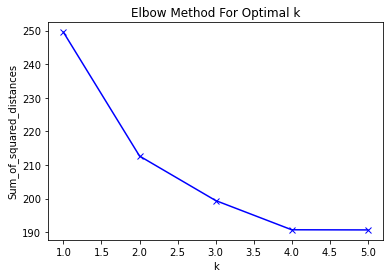

In [32]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
# set number of clusters
kclusters = 2

houston_grouped_clustering = houston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels',  kmeans.labels_)

houston_merged = df_location

# merge houston_grouped with houston_data to add latitude/longitude for each neighborhood
houston_merged = houston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

houston_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Willowbrook, Houston",29.660254,-95.456096,1.0,Home Service,Furniture / Home Store,Performing Arts Venue,Art Gallery,Zoo Exhibit,Dive Bar,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
1,"Greater Greenspoint, Houston",29.944719,-95.416074,1.0,Shoe Store,Supplement Shop,Department Store,Café,Mexican Restaurant,Pizza Place,Men's Store,Gym,Theme Park,Dog Run
2,"Carverdale, Houston",29.848687,-95.539450,0.0,Pool Hall,Lighting Store,Park,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Dog Run
3,"Fairbanks / Northwest Crossing, Houston",29.852726,-95.524386,1.0,Hardware Store,BBQ Joint,Cafeteria,Zoo Exhibit,Dog Run,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
4,"Acres Home, Houston",32.636256,-83.692962,1.0,Seafood Restaurant,Liquor Store,Zoo Exhibit,Dive Bar,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop


In [35]:
houston_merged.dropna(inplace=True,axis=0)

In [36]:
houston_merged.shape

(55, 14)

In [37]:
houston_merged["Cluster Labels"]=houston_merged["Cluster Labels"].astype(int)
houston_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Willowbrook, Houston",29.660254,-95.456096,1,Home Service,Furniture / Home Store,Performing Arts Venue,Art Gallery,Zoo Exhibit,Dive Bar,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
1,"Greater Greenspoint, Houston",29.944719,-95.416074,1,Shoe Store,Supplement Shop,Department Store,Café,Mexican Restaurant,Pizza Place,Men's Store,Gym,Theme Park,Dog Run
2,"Carverdale, Houston",29.848687,-95.539450,0,Pool Hall,Lighting Store,Park,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop,Dog Run
3,"Fairbanks / Northwest Crossing, Houston",29.852726,-95.524386,1,Hardware Store,BBQ Joint,Cafeteria,Zoo Exhibit,Dog Run,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
4,"Acres Home, Houston",32.636256,-83.692962,1,Seafood Restaurant,Liquor Store,Zoo Exhibit,Dive Bar,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
5,"Hidden Valley, Houston",29.892914,-95.418131,1,Rental Service,Historic Site,Zoo Exhibit,Discount Store,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop
6,"Westbranch, Houston",29.839541,-95.551522,0,Nightclub,Park,Clothing Store,Zoo Exhibit,Dive Bar,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
7,"Addicks / Park Ten, Houston",29.787215,-95.643888,1,Hotel,Indian Restaurant,Mexican Restaurant,Coffee Shop,Residential Building (Apartment / Condo),Sports Bar,Shipping Store,Sandwich Place,Salad Place,Restaurant
8,"Spring Branch West, Houston",29.801410,-95.547879,1,Mexican Restaurant,Thrift / Vintage Store,Park,Donut Shop,Food Truck,Fried Chicken Joint,Bakery,Karaoke Bar,IT Services,Ice Cream Shop
9,"Langwood, Houston",29.826282,-95.482795,0,Park,Zoo Exhibit,Dive Bar,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop


In [38]:
map_houston = folium.Map(location=[latitude,longitude],zoom_start=10)

#add markers
for  area, lat, long, cluster in zip(houston_merged['Neighborhood'],
                                     houston_merged['Latitude'],
                                     houston_merged['Longitude'],
                                     houston_merged['Cluster Labels']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(area, parse_html=True),
        radius=5,
        color=colors[cluster]
    ).add_to(map_houston)
    
    
      
map_houston

### Cluster 0

In [1]:
houston_merged.loc[houston_merged['Cluster Labels'] == 0, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

NameError: name 'houston_merged' is not defined

### Cluster 1 contains maximum number of neighborhoods, where most basic need like Pharmacy, bank, food place and park are met. Families are mostly attracted to these kind of neighborhood.

### IAH airport and Kingswood neighborhood both fall under developed area (cluster 1). As we know, venues are usually high around the airport , we lean toward kingswood Neighborhood to built a new school. 

In [112]:
houston_merged.loc[houston_merged['Cluster Labels'] == 1, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,29.660254,Furniture / Home Store,Performing Arts Venue,Art Gallery,Zoo Exhibit,Dive Bar,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
1,29.944719,Supplement Shop,Department Store,Café,Mexican Restaurant,Pizza Place,Men's Store,Gym,Theme Park,Dog Run
3,29.852726,BBQ Joint,Cafeteria,Zoo Exhibit,Dog Run,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store
4,32.636256,Liquor Store,Zoo Exhibit,Dive Bar,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
5,29.892914,Historic Site,Zoo Exhibit,Discount Store,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop
7,29.787215,Indian Restaurant,Mexican Restaurant,Coffee Shop,Residential Building (Apartment / Condo),Sports Bar,Shipping Store,Sandwich Place,Salad Place,Restaurant
8,29.801410,Thrift / Vintage Store,Park,Donut Shop,Food Truck,Fried Chicken Joint,Bakery,Karaoke Bar,IT Services,Ice Cream Shop
10,29.836905,Zoo Exhibit,Convenience Store,Flower Shop,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop
11,29.863003,Yoga Studio,Flower Shop,Fast Food Restaurant,Farmers Market,Event Service,Empanada Restaurant,Electronics Store,Duty-free Shop,Donut Shop
12,29.713527,Coffee Shop,Restaurant,American Restaurant,Pharmacy,Theme Park,Outdoors & Recreation,Salad Place,Café,Breakfast Spot


## Results and Discussion <a name="results"></a>

Our analysis shows there wasn't much of development in Austin, Liberty, Galveston and Waller county in the span of 7 years. Our best prediction is to go with Brazoria, Fort Bend, Harris and Montgomery county. Although there is a great number of priate school in Houston, there are pockets of low school density fairly close to city center. Highest concentration of private school was detected on South-west part of Houston, so we focused our attention to area north-east part of Houston, corresponding to Harris county with low density of private schools. Another area was identified as potentially interesting (Montogmery county, north part of Houston), but our attention was focused on north-east part of Harris county which offer a combination of popularity among families, closeness to city center and strong socio-economic dynamics.

After directing our attention to this more narrow area of interest. we first analyzed top 10 venues in the neighborhoods all over Houston, and then clustered to create zones of interest which contain greatest number of venues. Focusing our intrtrest on Kingswood neigborhood which is highly developed and has all the amenities. Another neighborhood at IAHairport, eliminated from the list of interest since it has been biased with the venues within the airport.

The result is highly based on county census, density of private school and neighborhood development. Other data that can interpret the result, are the average income and race of the population living in the neighborhood, further analysis can be done to support our result. 

Purpose of this analysis was to only provide info on areas close to Houston but not crowded with existing schools - it is entirely possible that there is a very good reason for small number of schools in any of those areas, reasons which would make them unsuitable for a new school regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Houston areas close to center with low number of private schools in order to aid stakeholders in narrowing down the search for optimal location for a new private school. By analyzing private school data and visualizing density distribution, we have first identified general area (north-east part of Houston), and then with collection of top 10 venues data using Foursquare which satisfy some basic requirements regarding developed neighborhood. Clustering of those venues was then performed in order to create major zones of interest (containing greatest number of potential locations) to be used as starting points for final exploration by stakeholders.

Final decission on optimal private school location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.